In [2]:
import os

import numpy as np
import cv2
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

### Load the data files

In [14]:
#root_dir = '/home/uid38717/Documents/Waste-Classifier'
root_dir = r'D:\2019\Waste-Classifier'
data_dir = 'data_files'

train_file = os.path.join(root_dir,data_dir,'trashnet_train.csv')
val_file = os.path.join(root_dir,data_dir,'trashnet_val.csv')
test_file = os.path.join(root_dir,data_dir,'trashnet_test.csv')

train_df = pd.read_csv(train_file,usecols=['FileName','Label','ClassName'])
val_df = pd.read_csv(val_file,usecols=['FileName','Label','ClassName'])
test_df = pd.read_csv(test_file,usecols=['FileName','Label','ClassName'])

### See the first few samples

In [15]:
# this will print the first 3 samples
print ('Training dataframe')
print (train_df.head(3))
print ('-------------------------------------------------------------------------------')
print ('validation dataframe')
print (val_df.head(3))
print ('-------------------------------------------------------------------------------')
print ('test dataframe')
print (test_df.head(3))

Training dataframe
                                     FileName  Label  ClassName
0    dataset-resized\cardboard\cardboard1.jpg      0  cardboard
1   dataset-resized\cardboard\cardboard10.jpg      0  cardboard
2  dataset-resized\cardboard\cardboard102.jpg      0  cardboard
-------------------------------------------------------------------------------
validation dataframe
                                     FileName  Label  ClassName
0  dataset-resized\cardboard\cardboard118.jpg      0  cardboard
1  dataset-resized\cardboard\cardboard126.jpg      0  cardboard
2  dataset-resized\cardboard\cardboard131.jpg      0  cardboard
-------------------------------------------------------------------------------
test dataframe
                                     FileName  Label  ClassName
0  dataset-resized\cardboard\cardboard100.jpg      0  cardboard
1  dataset-resized\cardboard\cardboard101.jpg      0  cardboard
2  dataset-resized\cardboard\cardboard105.jpg      0  cardboard


num of train samples:  1827


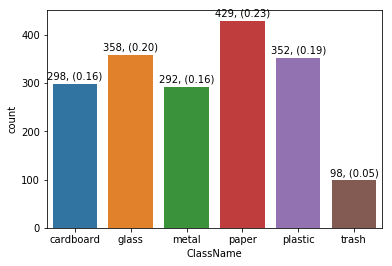

In [24]:
# Filter out the poistive and negative samples from the dataframe
#positive_sample_tr = train_df[train_df['class_label']==1]
#negative_sample_tr = train_df[train_df['class_label']==0]

num_train_samples = len(train_df)
#num_neg_samples_tr = len(negative_sample_tr)
print ('num of train samples: ', num_train_samples)
#print ('num of negative samples in training data: ', num_neg_samples_tr)

#dist = train_df['labels'].value_counts
ax=sns.countplot(train_df['ClassName'])
total = len(train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+10 ,
            '{}, ({:1.2f})'.format(height,(height/total)),
            ha="center")

dataset-resized\trash\trash48.jpg
dataset-resized\trash\trash115.jpg
dataset-resized\plastic\plastic304.jpg
dataset-resized\plastic\plastic3.jpg
dataset-resized\trash\trash111.jpg
dataset-resized\plastic\plastic81.jpg
dataset-resized\cardboard\cardboard132.jpg
dataset-resized\paper\paper517.jpg
dataset-resized\plastic\plastic268.jpg


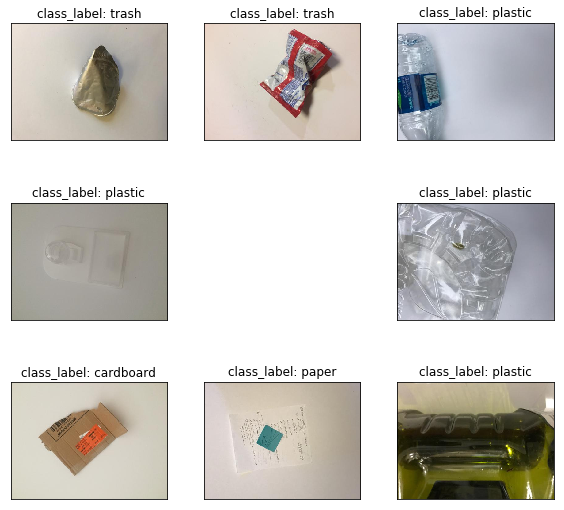

In [33]:
# read some of train samples
fig = plt.figure(figsize=(8,8))
for i in range(9):
  ind =  random.randint(0,len(train_df))
  img_sample = train_df.iloc[ind,0]
  print(img_sample)

  class_name = train_df.iloc[ind,2]
  img = cv2.imread(os.path.join(root_dir,img_sample))
  img = img[:,:,::-1]
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(img, interpolation='none')
  plt.title("class_label: {}".format(class_name))
  plt.xticks([])
  plt.yticks([])
#fig

num of val samples:  326


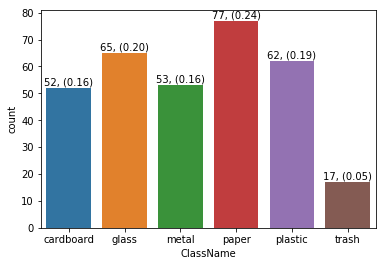

In [32]:
num_val_samples = len(val_df)
#num_neg_samples_tr = len(negative_sample_tr)
print ('num of val samples: ', num_val_samples)
#print ('num of negative samples in training data: ', num_neg_samples_tr)

#dist = train_df['labels'].value_counts
ax=sns.countplot(val_df['ClassName'])
total = len(val_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+1 ,
            '{}, ({:1.2f})'.format(height,(height/total)),
            ha="center")

dataset-resized\paper\paper56.jpg
dataset-resized\trash\trash118.jpg
dataset-resized\metal\metal101.jpg
dataset-resized\metal\metal266.jpg
dataset-resized\glass\glass254.jpg
dataset-resized\plastic\plastic357.jpg
dataset-resized\metal\metal206.jpg
dataset-resized\cardboard\cardboard210.jpg
dataset-resized\metal\metal230.jpg


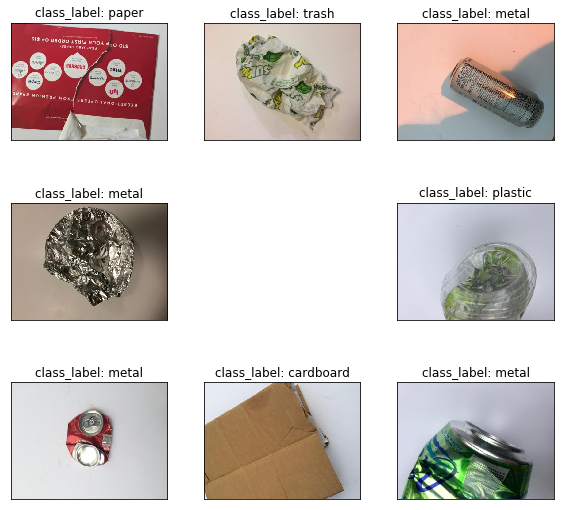

In [36]:
# read some of validation samples
fig = plt.figure(figsize=(8,8))
for i in range(9):
  ind =  random.randint(0,len(val_df))
  img_sample = val_df.iloc[ind,0]
  print(img_sample)

  class_name = val_df.iloc[ind,2]
  img = cv2.imread(os.path.join(root_dir,img_sample))
  img = img[:,:,::-1]
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(img, interpolation='none')
  plt.title("class_label: {}".format(class_name))
  plt.xticks([])
  plt.yticks([])

num of test samples:  374


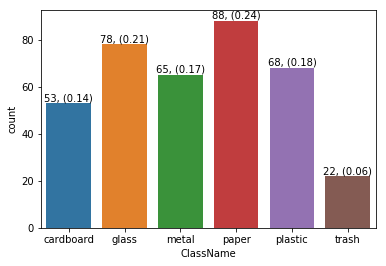

In [38]:
num_test_samples = len(test_df)
#num_neg_samples_tr = len(negative_sample_tr)
print ('num of test samples: ', num_test_samples)
#print ('num of negative samples in training data: ', num_neg_samples_tr)

#dist = train_df['labels'].value_counts
ax=sns.countplot(test_df['ClassName'])
total = len(test_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+1 ,
            '{}, ({:1.2f})'.format(height,(height/total)),
            ha="center")

dataset-resized\glass\glass217.jpg
dataset-resized\metal\metal276.jpg
dataset-resized\cardboard\cardboard347.jpg
dataset-resized\glass\glass63.jpg
dataset-resized\plastic\plastic101.jpg
dataset-resized\plastic\plastic229.jpg
dataset-resized\paper\paper441.jpg
dataset-resized\plastic\plastic44.jpg
dataset-resized\metal\metal318.jpg


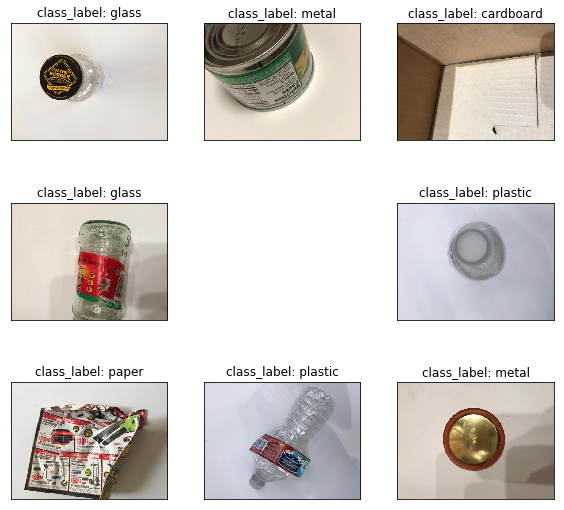

In [39]:
# read some of test samples
fig = plt.figure(figsize=(8,8))
for i in range(9):
  ind =  random.randint(0,len(val_df))
  img_sample = val_df.iloc[ind,0]
  print(img_sample)

  class_name = val_df.iloc[ind,2]
  img = cv2.imread(os.path.join(root_dir,img_sample))
  img = img[:,:,::-1]
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(img, interpolation='none')
  plt.title("class_label: {}".format(class_name))
  plt.xticks([])
  plt.yticks([])